In [11]:
from imutils import paths
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
import random

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [13]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
#Fetching

In [16]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/DATA-MINING-MACHINE-LEARNING-semester-2-/The Final Project/Data/Dataset/FR0"))

data = []
data_cropped = []
labels = []
label = 0
counter_0 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 124, 124, 50, 50)
  data_cropped.append(image)
  labels.append(label)
  counter_0 += 1
print(f'Loaded FR0... {counter_0} files has loaded.')

2024-09-05 20:38:19.931756: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-05 20:38:19.934222: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-09-05 20:38:19.934567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-09-05 20:38:19.934793: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro P2000 computeCapability: 6.1
coreClock: 1.607GHz coreCount: 6 deviceMemorySize: 3.94GiB deviceMemoryBandwidth: 89.53GiB/s
2024-09-

Loaded FR0... 6066 files has loaded.


In [17]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/DATA-MINING-MACHINE-LEARNING-semester-2-/The Final Project/Data/Dataset/FRI"))


label = 1
counter_1 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 124, 124, 50, 50)
  data_cropped.append(image)
  labels.append(label)
  counter_1 += 1
print(f'Loaded FRI... {counter_1} files has loaded.')

Loaded FRI... 5008 files has loaded.


In [18]:
# Reading FRI Images
imagePaths = list(paths.list_images(r"/media/gunner/5A300FFA300FDC3F/My Projects/DATA-MINING-MACHINE-LEARNING-semester-2-/The Final Project/Data/Dataset/FRII"))

label = 2
counter_2 = 0

for imagePath in imagePaths:
  image = tf.io.read_file(imagePath)
  image = tf.image.decode_image(image, channels=1)
  data.append(image)
  image = tf.image.crop_to_bounding_box(image, 124, 124, 50, 50)
  data_cropped.append(image)
  labels.append(label)
  counter_2 += 1
print(f'Loaded FRII... {counter_2} files has loaded.')

Loaded FRII... 2066 files has loaded.


#EDA

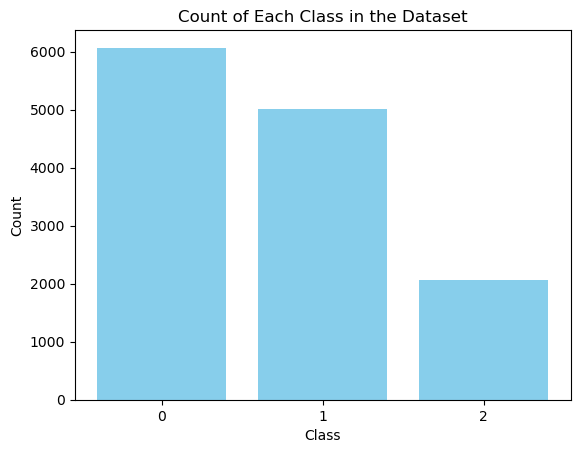

In [19]:
counter = Counter(labels)
sorted_counts = dict(sorted(counter.items()))
plt.bar(sorted_counts.keys(), sorted_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class in the Dataset')
plt.xticks(range(3))
plt.show()

In [20]:
labels = np.array(labels,dtype='uint8')
data = np.array(data,dtype='uint8')
data_cropped = np.array(data_cropped,dtype='uint8')

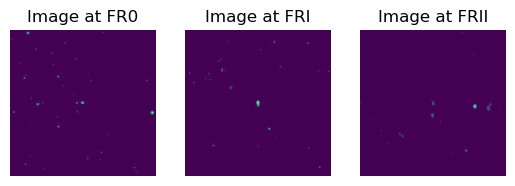

In [21]:
image = np.squeeze(data[10])
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title(f"Image at FR0")

image = np.squeeze(data[7111])
plt.subplot(1, 3, 2)
plt.imshow(image)
plt.axis('off')
plt.title(f"Image at FRI")

image = np.squeeze(data[12001])
plt.subplot(1, 3, 3)
plt.imshow(image)
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

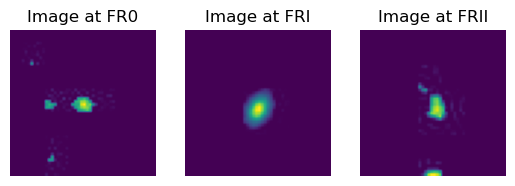

In [22]:
image = np.squeeze(data_cropped[10])
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title(f"Image at FR0")

image = np.squeeze(data_cropped[7101])
plt.subplot(1, 3, 2)
plt.imshow(image)
plt.axis('off')
plt.title(f"Image at FRI")

image = np.squeeze(data_cropped[12001])
plt.subplot(1, 3, 3)
plt.imshow(image)
plt.axis('off')
plt.title(f"Image at FRII")


plt.show()

In [23]:
type(data_cropped)

numpy.ndarray

In [24]:
data_cropped.shape

(13140, 50, 50, 1)

In [25]:
np.min(data_cropped[0]), np.max(data_cropped[0])

(0, 248)

#Preprocessing

In [26]:
data_normalized = data_cropped / 255

In [27]:
print(f'Min of original = {np.min(data_cropped[0])}')
print(f'Max of original = {np.max(data_cropped[0])}')
print(f'Min of original = {np.min(data_normalized[0])}')
print(f'Max of original = {np.max(data_normalized[0])}')

Min of original = 0
Max of original = 248
Min of original = 0.0
Max of original = 0.9725490196078431


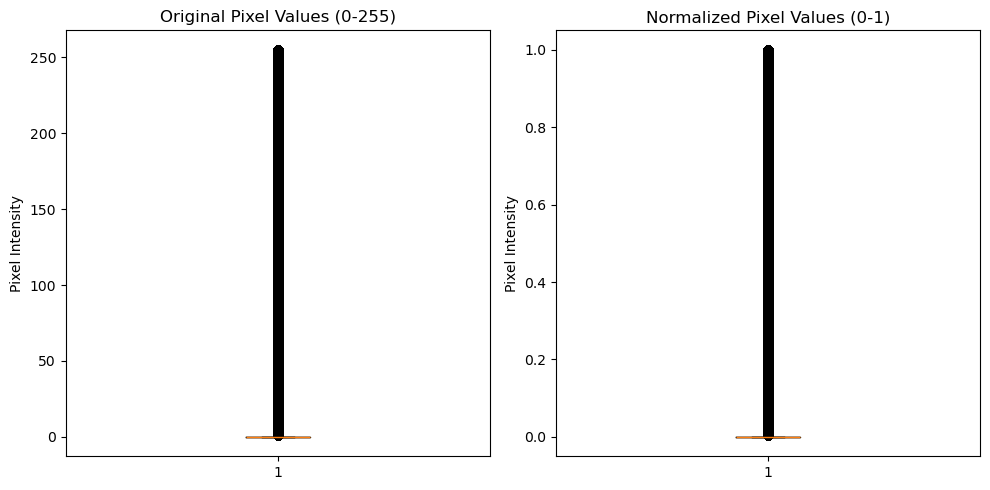

In [28]:
cropped_flat = data_cropped.flatten()
normalized_flat = data_normalized.flatten()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(cropped_flat)
plt.title("Original Pixel Values (0-255)")
plt.ylabel("Pixel Intensity")

plt.subplot(1, 2, 2)
plt.boxplot(normalized_flat)
plt.title("Normalized Pixel Values (0-1)")
plt.ylabel("Pixel Intensity")

plt.tight_layout()
plt.show()

#Splitting

In [29]:
x = data_normalized
y = labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9198, 50, 50, 1), (9198,), (3942, 50, 50, 1), (3942,))

#Modelling

In [30]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=3, activation=keras.activations.softmax))

In [41]:
optimizer = keras.optimizers.Adam()
loss = keras.losses.SparseCategoricalCrossentropy()
metric = [keras.metrics.CategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss, metrics=metric)

In [42]:
model.build(input_shape=(None, 50, 50))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               640256    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 772,611
Trainable params: 772,611
Non-trainable params: 0
_________________________________________________________________


In [43]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
144/144 [==============================] - 1s 3ms/step - loss: 0.0184 - categorical_accuracy: 0.4766 - val_loss: 10.3951 - val_categorical_accuracy: 0.4650
Epoch 2/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.0191 - categorical_accuracy: 0.4681 - val_loss: 10.3757 - val_categorical_accuracy: 0.4769
Epoch 3/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.0204 - categorical_accuracy: 0.4772 - val_loss: 11.8320 - val_categorical_accuracy: 0.4924
Epoch 4/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.0269 - categorical_accuracy: 0.4660 - val_loss: 10.0479 - val_categorical_accuracy: 0.4815
Epoch 5/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.0182 - categorical_accuracy: 0.4673 - val_loss: 11.6464 - val_categorical_accuracy: 0.4977
Epoch 6/1000
144/144 [==============================] - 0s 3ms/step - loss: 0.0213 - categorical_accuracy: 0.4697 - val_loss: 11.5969 - val_categorical_acc

KeyboardInterrupt: 

In [34]:
index = random.randint(0, 3942)
test_image = x_test[index]

In [35]:
test_data = np.reshape(test_image, (-1, 2500))
test_data.shape

(1, 2500)

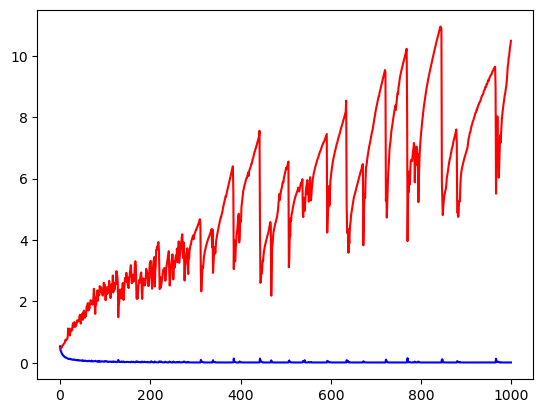

In [36]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.show()
